In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

df = pd.read_csv('Banknote-authentication-dataset-.csv')
df.head(1500)


,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


Get the data types of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


Describe the Dataset

In [5]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


Checking for Null Values

In [6]:
df.isnull().sum()

V1    0
V2    0
dtype: int64

# Exploratory Data Analysis

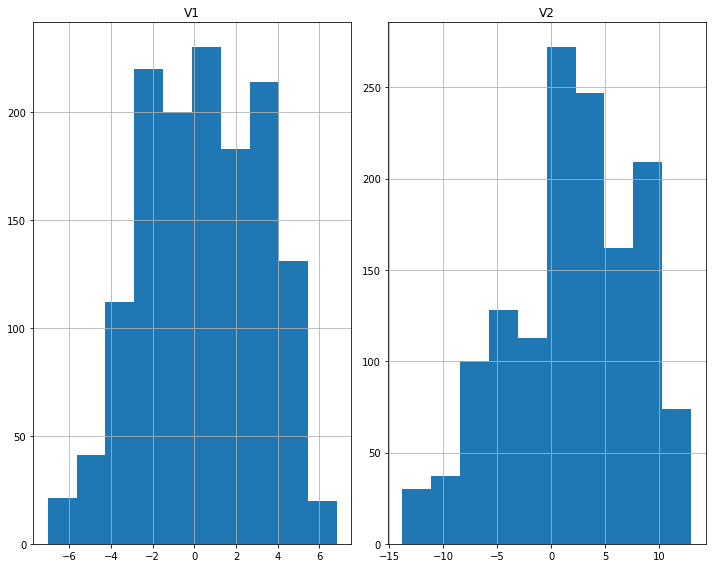

In [7]:
# Visualize the distributions of continuous variables using histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Visualize the relationships between pairs of continuous variables using scatter plots


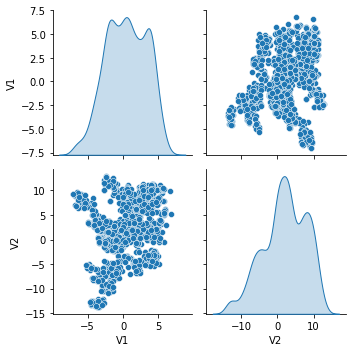

In [8]:
sns.pairplot(df, diag_kind='kde')
plt.tight_layout()
plt.show()

# Visualize the box plots to identify outliers


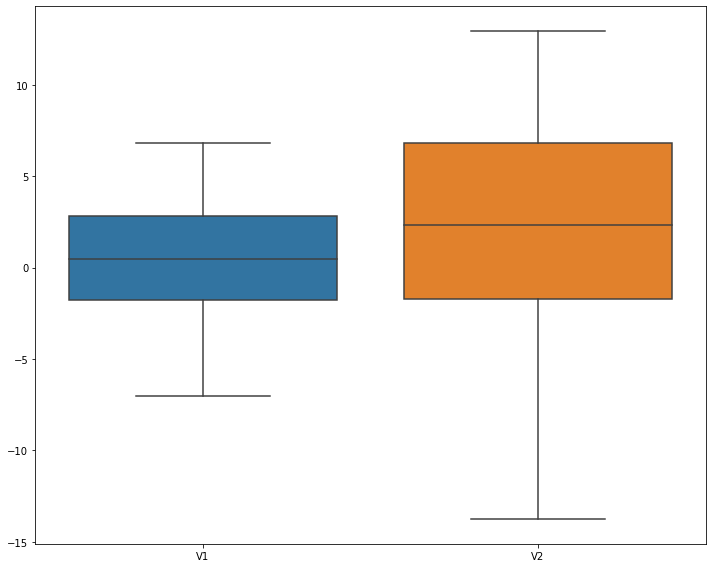

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

# Calculate the correlation matrix


In [12]:
corr_matrix = df.corr()
corr_matrix

,V1,V2
V1,1.000000,0.264026
V2,0.264026,1.000000


# Visualize the correlation matrix using a heatmap


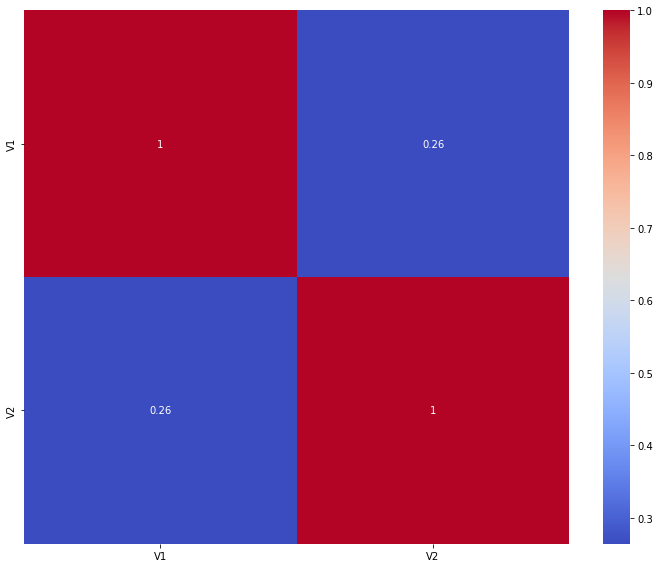

In [13]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

# Plot the class distribution


In [ ]:


plt.figure(figsize=(6, 6))
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

## heatmap of correlation of columns with one another


## Data Standardization


In [49]:
from sklearn.preprocessing import StandardScaler

x = df['V1']
y = df['V2']

X = df[['V1', 'V2']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

         V1        V2
0  1.121806  1.149455
1  1.447066  1.064453
2  1.207810 -0.777352
3  1.063742  1.295478
4 -0.036772 -1.087038


In [ ]:
plt.scatter(X_scaled['V1'], X_scaled['V2'])

## Data normalization


In [ ]:
data_normalised = (df - df.min())/(df.max() - df.min())
data_normalised.head()

# Applying Model

## Find the cluster centers


In [30]:
from sklearn.cluster import KMeans 

clstr = KMeans(n_clusters=2).fit(X_scaled)
centers = clstr.cluster_centers_
print(centers)

[[ 0.65722693  0.48757905]
 [-0.84814093 -0.62921303]]


In [ ]:
plt.scatter(X_scaled['V1'], X_scaled['V2'], c = clstr)
plt.scatter(centers[:,0], centers[:,1], c = 'red', alpha = .5, s = 300)

## Assign each observation to its appropriate cluster


In [67]:
clstr_fit = KMeans(n_clusters=2).fit_predict(X_scaled)
X_scaled['Class'] = clstr_fit
print(X_scaled.head(100))
print(clstr_fit)

          V1        V2  Class
0   1.121806  1.149455      1
1   1.447066  1.064453      1
2   1.207810 -0.777352      1
3   1.063742  1.295478      1
4  -0.036772 -1.087038      0
..       ...       ...    ...
95 -0.379507 -1.112776      0
96  0.886984 -0.144259      1
97  0.608033 -1.500408      0
98  1.191622  1.534973      1
99 -1.117502  1.616089      1

[100 rows x 3 columns]
[1 1 1 ... 0 0 0]


In [69]:
df['Class'] = clstr_fit

In [70]:
df

,V1,V2,Class
0,3.62160,8.66610,1
1,4.54590,8.16740,1
2,3.86600,-2.63830,1
3,3.45660,9.52280,1
4,0.32924,-4.45520,0
...,...,...,...
1367,0.40614,1.34920,1
1368,-1.38870,-4.87730,0
1369,-3.75030,-13.45860,0
1370,-3.56370,-8.38270,0


### Split the data into features and target variable


In [71]:
X = df.drop('Class', axis=1)
y = df['Class']

### Split the data into training and test sets


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Instantiate a Random Forest classifier


In [98]:
rf = RandomForestClassifier(random_state=42)

## Train the Random Forest classifier


In [99]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
predicted_clusters = rf.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, predicted_clusters)
print("Accuracy:", accuracy)


Accuracy: 0.9975728155339806


In [102]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_clusters)
precision = precision_score(y_test, predicted_clusters)
recall = recall_score(y_test, predicted_clusters)
f1 = f1_score(y_test, predicted_clusters)

In [103]:
# Create a list of evaluation metric names and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Create a list of metric rows
metric_rows = []
for metric, value in zip(metrics, values):
    metric_rows.append([metric, value])

# Generate the image table
table = tabulate(metric_rows, headers=['Metric', 'Value'], tablefmt='fancy_grid')

# Print the image table
print("Evaluation Metrics:")
print(table)

Evaluation Metrics:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.997573 │
├───────────┼──────────┤
│ Precision │ 0.995868 │
├───────────┼──────────┤
│ Recall    │ 1        │
├───────────┼──────────┤
│ F1-Score  │ 0.99793  │
╘═══════════╧══════════╛


### Perform cross-validation and obtain predicted cluster assignments


In [77]:
predicted_clusters = cross_val_predict(rf, X_scaled, y, cv=5)

Evaluation Metrics:
╒═══════════╤═════════╕
│ Metric    │   Value │
╞═══════════╪═════════╡
│ Accuracy  │       1 │
├───────────┼─────────┤
│ Precision │       1 │
├───────────┼─────────┤
│ Recall    │       1 │
├───────────┼─────────┤
│ F1-Score  │       1 │
╘═══════════╧═════════╛


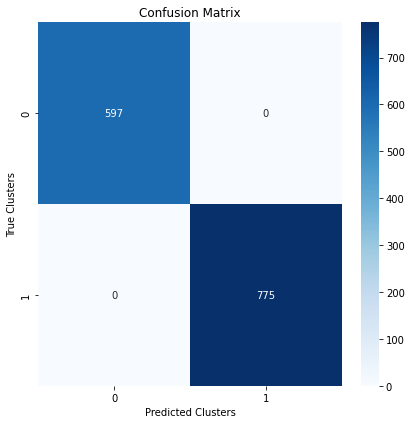

In [80]:
# Generate and plot the confusion matrix
cm = confusion_matrix(y, predicted_clusters)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Clusters')
plt.tight_layout()
plt.show()

## Visualise the data


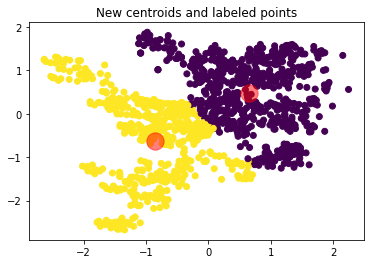

In [60]:
plt.title('New centroids and labeled points')
plt.scatter(X_scaled['V1'], X_scaled['V2'], c = clstr_fit)
plt.scatter(centers[:,0], centers[:,1], c = 'red', alpha = .5, s = 300)

# Plot the class distribution


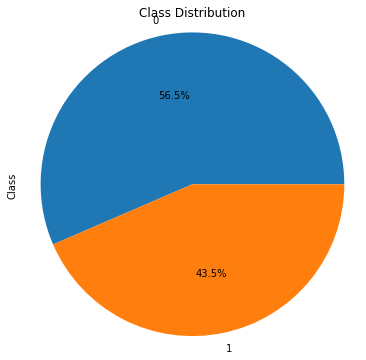

In [65]:
plt.figure(figsize=(6, 6))
X_scaled['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

## Cluster centers and the number of observations in each cluster


In [63]:
print(centers)
X_scaled['Class'].value_counts()

[[ 0.65722693  0.48757905]
 [-0.84814093 -0.62921303]]


0    775
1    597
Name: Class, dtype: int64

_________________________________________

In [22]:
# Find the cluster centers

x = data_normalised['V1']
y = data_normalised['V2']
xy = np.column_stack((x,y))

clstr = KMeans(n_clusters=2).fit(xy)
centers = clstr.cluster_centers_
print(centers)

# Assign each observation to its appropriate cluster

clstr_fit = KMeans(n_clusters=2).fit_predict(xy)
data_normalised['cluster'] = clstr_fit
print(data_normalised.head())
print(clstr_fit)

# Cluster centers and the number of observations in each cluster

print(centers)
data_normalised['cluster'].value_counts()

[[0.36873215 0.44728753]
 [0.67311163 0.69741644]]
         V1        V2  cluster
0  0.769004  0.839643        1
1  0.835659  0.820982        1
2  0.786629  0.416648        1
3  0.757105  0.871699        1
4  0.531578  0.348662        0
[1 1 1 ... 0 0 0]
[[0.36873215 0.44728753]
 [0.67311163 0.69741644]]


1    765
0    607
Name: cluster, dtype: int64

In [15]:
clstr_fit

array([1, 1, 1, ..., 0, 0, 0])

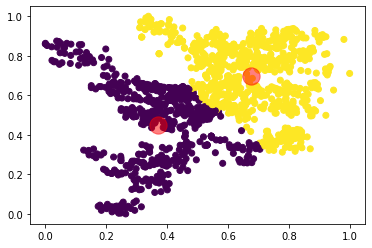

In [16]:
plt.scatter(x, y, c = clstr_fit)
plt.scatter(centers[:,0], centers[:,1], c = 'red', alpha = .5, s = 300)

In [17]:
plt.savefig('fig2')

<Figure size 432x288 with 0 Axes>

In [18]:
from scipy.spatial import distance

point_1 = (1,2,3)
point_2 = (4,5,6)
point_1, point_2

((1, 2, 3), (4, 5, 6))

In [19]:
minkowski_dist = distance.minkowski(point_1, point_2, p=3)
print(minkowski_dist)

4.3267487109222245


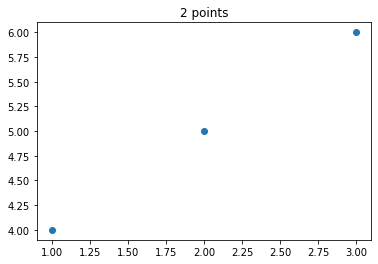

In [20]:
plt.title('2 points')

plt.scatter(point_1, point_2)